# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [60]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

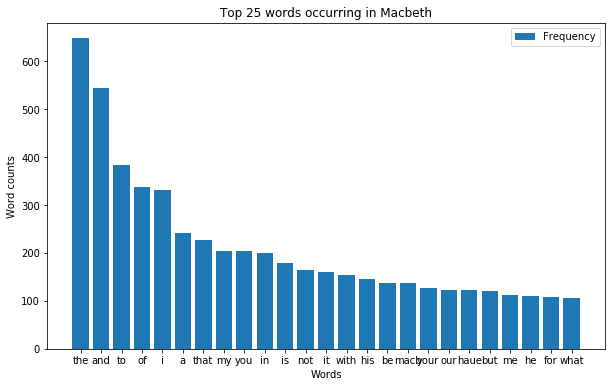

In [80]:
# Your code here

# Pseudo-code Outline
# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts

# general approach is to locate word boundaries.
# in this case a word boundary is simply a space
# but, the form in which we receive the text
# contains non-alphabetic characters which we
# need to normalize non-space, non-alphanumeric
# characters as spaces.
# when we encounter a string of non-alphanumeric
# characters, we treat the entire string as a
# single delimiter (word boundary)

# loop through each character in the macbeth list.
# let's use regular expressions in order to easily
# match alphanumeric (valid) characters.
# any non-alphanumeric (string) shall be considered
# a word delimiter.
# whenever we encounter the end of a word - that is
# when we encounter a word delimiter when the last
# character was a valid word-character, we increment
# the count, held in a dictionary, for that word.

import re
alphabet = "abcdefghijklmnopqrstuvwxyz"
numbers = "0123456789"
alphanumericpattern = "[" + alphabet + numbers + "]"
inword = False #used to track state of new/closing word boundaries

wordmap = dict()

#I use the following to skip over all of the words
#which are not actually part of the manuscript
#after some experimentation, that index of the very
#first character following all of that is 16671
start_offset = 16671

for index, character in enumerate(macbeth[start_offset:]):
    lcase = character.lower()
    #special-handling: treat single-quote/apostrophe as empty string and skip
    if lcase == "'" or lcase == "`":
        #the following print statement is for debugging only
        #print("macbeth[{}]: \"{}\" has no effect on parsing... SKIPPING".format(index, character))
        continue
        
    #use the regex to determine whether we have a delimiter or word-character
    match_alphanumberic = re.match(alphanumericpattern, lcase, 0)
    
    if match_alphanumberic:
        if not inword: # then we have a new word
            inword = True
            word = ""
    else:
        if inword: # then, as this is a non-alphanmeric character but we previously "inword", we have just completed a word
            #first get count for this word (if it exists)
            count = wordmap.get(word)
            
            if count: #then this entry exists, so increment its count
                count += 1
            else: #then this entry does not exist, so set its initial count to 1
                count = 1
                
            #now update the current count for this word
            wordmap[word] = count
            
            #the following print statement is for debugging only
            #print("UPDATE \"{}\" count to: {}".format(word, str(count)))
            
            #don't forget to reset inword to False to demark word boundary (closure)
            inword = False
            
    #process word boundary
    if inword: #then we need to append the lowercase version of this character
        word += lcase
    
    #the following print statement is for debugging only
    #print("macbeth[{}]: \"{}\"{}".format(index, character, " word: {}".format(word) if inword else ""))

#the following print statement is for debugging only
#print(wordmap)

sortedwordmapentrylist = sorted(wordmap.items(), key=lambda wordmapentry: wordmapentry[1], reverse=True)
#print("The top 25 most frequently occurring words are:\n{}".format(sortedwordcountlist[:25]))

# Create Bar Graph
# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

plt.figure(figsize=(10,20))

x_vals = []
y_vals = []

top_n = 25
for wordmapentry in sortedwordmapentrylist[:top_n]:
    x_vals.append(wordmapentry[0])
    y_vals.append(wordmapentry[1])

# Use bar() function to create a plot using above values on both x and y co-ordinates. Add a label.
plt.bar(x_vals, y_vals, label='Frequency')

# Include descriptive titles and labels
plt.xlabel('Words')
plt.ylabel('Word counts')

plt.title("Top {} words occurring in Macbeth".format(str(top_n)))
plt.legend()

plt.show()

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!